In [1]:
import sys
from qtx import qtx

In [2]:
import pandas as pd

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)

Populating the interactive namespace from numpy and matplotlib


#### Select your API Endpoint

In [5]:
api = "market-data-eod"

#### Enter your API Token  
You can request your trial key at https://quantextive.com/request_aex/ or via the AEX portal (https://quantextive.com/dashboard)

In [6]:
api_key = '*****************'

#### Enter your Endpoint parameters 

In [7]:
params = { 
    'securityId': 'NSE:7UP',
    'startDate': '2016-11-01',
    'endDate': '2017-03-18'
}

See a list of all companies accessible with the API at https://quantextive.com/api_company_list/   
See a list of all available endpoints (https://quantextive.com/api_home/)

#### Initialize the module

In [8]:
client = qtx.ApiClient()

#### Return data based on your parameters

In [9]:
data = client.get(api_key, api, params).data_frame()

#### View data sample and datatypes

In [10]:
data.head()

,SecurityID,close_value,date,day_high,day_low,open_value,price_change_percent,volume
25,NSE:7UP,77.71,2017-03-17,77.71,77.71,77.71,0.0,6233
24,NSE:7UP,77.71,2017-03-16,86.0,77.71,86.0,-9.64,30734
23,NSE:7UP,86.0,2017-03-15,86.0,86.0,86.0,0.0,15327
22,NSE:7UP,86.0,2017-03-14,86.0,86.0,86.0,0.0,12716
21,NSE:7UP,86.0,2017-03-13,86.0,86.0,86.0,0.0,15366


In [11]:
data.dtypes

SecurityID                      object
close_value                     object
date                    datetime64[ns]
day_high                        object
day_low                         object
open_value                      object
price_change_percent            object
volume                          object
dtype: object

#### Convert integer-like columns to numeric format

In [12]:
data2 = data.convert_objects(convert_numeric=True, copy=True)

#### Re-index the dataframe (Set date as index)

In [13]:
data3 = data2.set_index('date')

In [14]:
data3.head()

,SecurityID,close_value,day_high,day_low,open_value,price_change_percent,volume
date,,,,,,,
2017-03-17,NSE:7UP,77.71,77.71,77.71,77.71,0.00,6233
2017-03-16,NSE:7UP,77.71,86.00,77.71,86.00,-9.64,30734
2017-03-15,NSE:7UP,86.00,86.00,86.00,86.00,0.00,15327
2017-03-14,NSE:7UP,86.00,86.00,86.00,86.00,0.00,12716
2017-03-13,NSE:7UP,86.00,86.00,86.00,86.00,0.00,15366


#### Visualize data

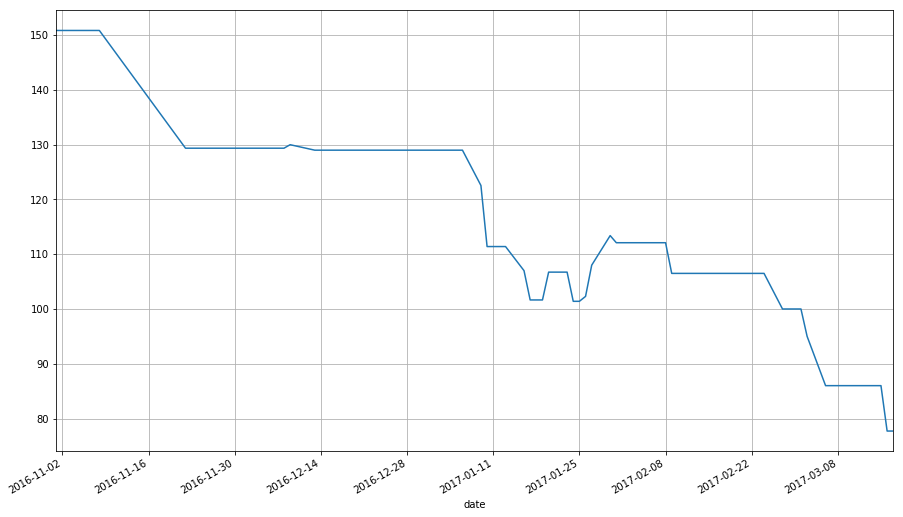

In [15]:
data3["close_value"].plot(grid = True)